# neu 350 spring 2021<br>week 7: human EEG

## contents

* [0. preamble](#head)
* [1. loading libraries](#lib)  
* [2. loading data](#load)
* [3. plotting periodograms and spectrograms](#plot)
* [4. dealing with event markers](#mark)

---

Please report any bugs/problems with this notebook to [Ed Discussion](https://edstem.org/us/courses/4492/discussion/).  

<u>Version 2021-03-22.</u> Tested to be compatible with:
* python 3.8.5
* numpy 1.19.2
* matplotlib 3.3.2
* scipy 1.5.2
* jupyter notebook 6.1.4


<a id="head"></a>
## 0. Preamble

This week you will analyze EEG recordings that you make from your very own brains.  The structure of the experiment is up to you, but the general idea is to explore frequencies present (e.g., in the alpha band) in V1 under various conditions.


### Relevant techniques already in our toolbox

* <span style="color:magenta">__Data wrangling__</span>


### Techniques we introduce in this notebook
* <span style="color:magenta">__Frequency analysis__</span>, plotting <span style="color:magenta">__periodograms__</span>, which show the power of different frequencies in a signal, and <span style="color:magenta">__spectrograms__</span>, which show how frequency components change over time.

Spectrograms are generally more useful for visual communication, while the frequency analysis plotted in a periodogram would be fair fodder for statistical tests once the data are separated by test condition.



<a id="lib"></a>
## 1. Loading Libraries

In [1]:
import matplotlib.pyplot as pl
from scipy.io import wavfile
import numpy as np

In [2]:
import matplotlib
%matplotlib notebook

<a id="load"></a>
## 2. Loading Data

In [3]:
samplerate, data = wavfile.read('BYB-EEG.wav')

print(samplerate)
print(data.ndim, np.shape(data))

data_matx = data.reshape(data.shape[0], 1)

print(data_matx.ndim, np.shape(data_matx))

length = len(data)/samplerate

print(f'length of file = {len(data)} samples at {samplerate} Hz = {length} s')



10000
1 (970750,)
2 (970750, 1)
length of file = 970750 samples at 10000 Hz = 97.075 s


<a id="plot"></a>
## 3. Plotting Periodograms and Spectrograms

<IPython.core.display.Javascript object>


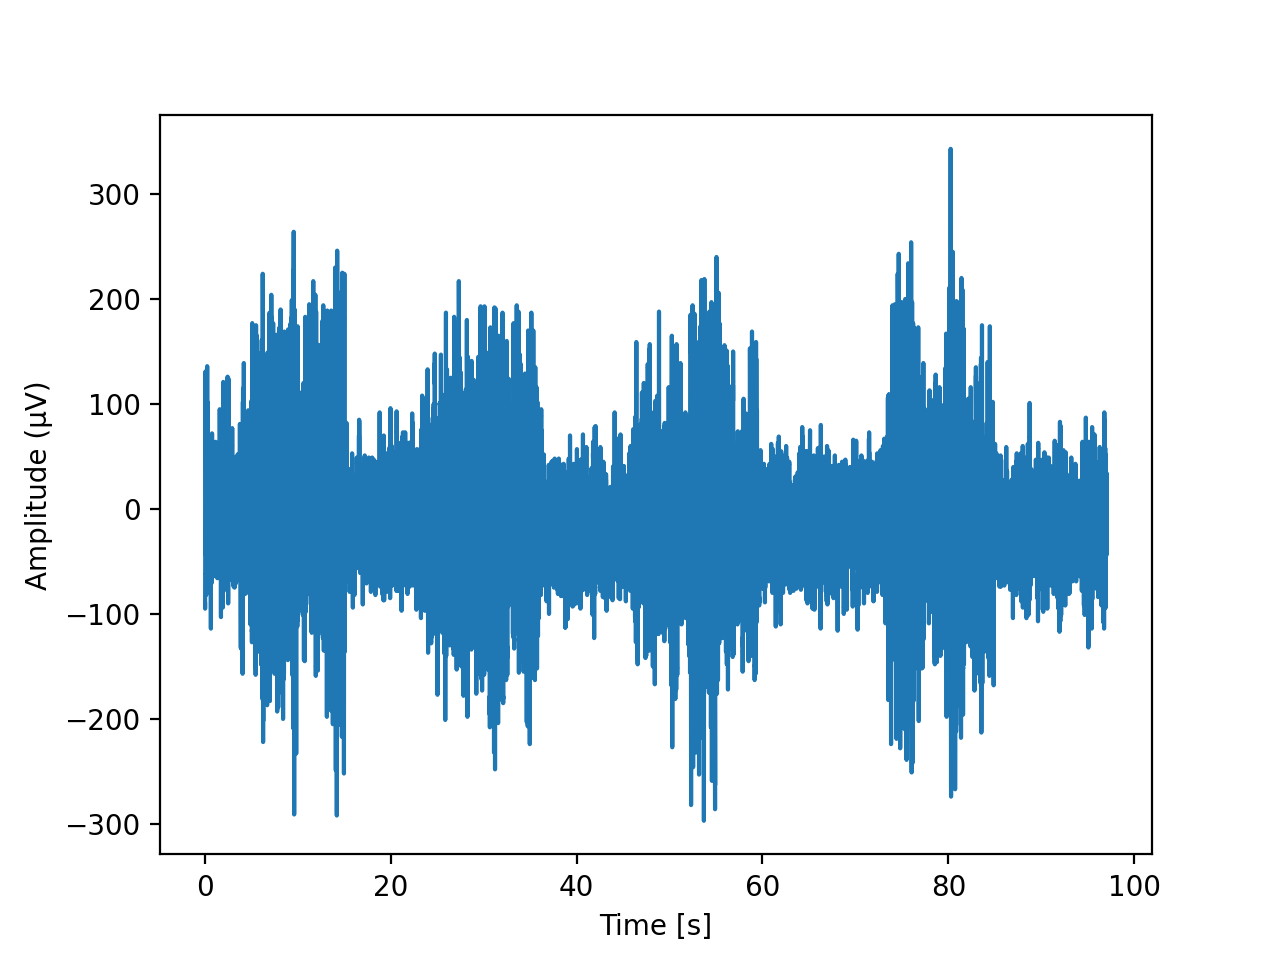

Text(0, 0.5, 'Amplitude (µV)')

In [4]:
time = np.linspace(0., length, data.shape[0])

fig1, ax1 = pl.subplots()
pl.plot(time, data)

## this is single channel data.  you may have to do additional wrangling if you collected in multi-channel.

pl.xlabel("Time [s]")
pl.ylabel("Amplitude (µV)")

<IPython.core.display.Javascript object>


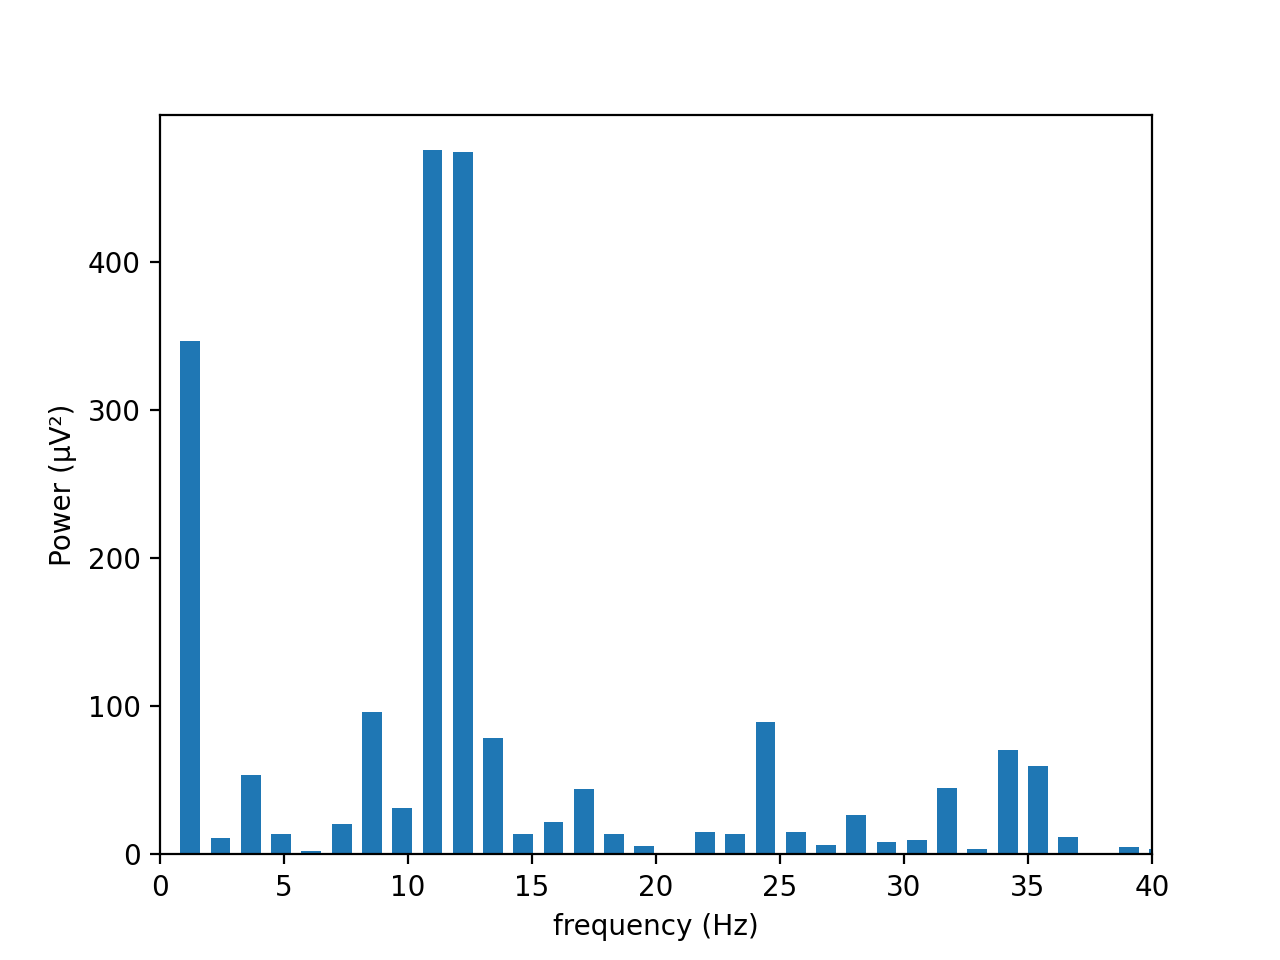

(0.0, 40.0)

In [5]:
## plot periodogram

from scipy import signal

nfft = 8192  

## this is the number of samples that you will feed to the fourier transform.

## You may need to tune this to your sampling frequency (particularly if different from the 10k of the
## sample file).  nfft should be a power of 2; the frequency resolution of each bin will be sample_freq 
## x 2/N.  Your aim is create bins that give you reasonable frequency resolution in the plot below.




<IPython.core.display.Javascript object>


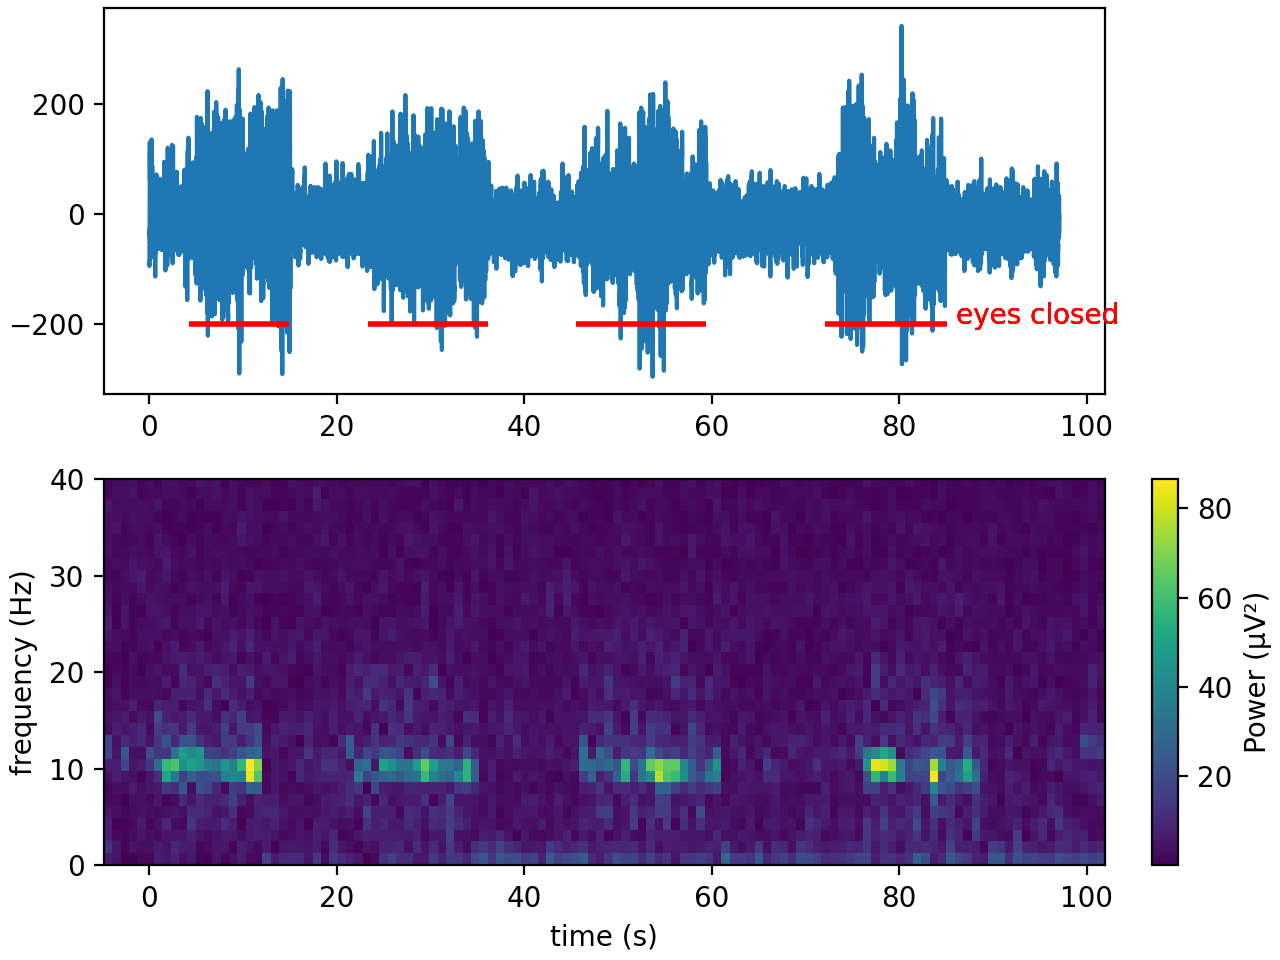

In [6]:
fig3, (ax3a, ax3b) = pl.subplots(nrows=2, constrained_layout=True)


ax3a.plot(time, data)


Pxx, freqs, bins, im = ax3b.specgram(data, Fs=samplerate, NFFT=nfft, mode="magnitude", xextent=ax1.get_xlim(), scale='linear')
ax3b.set_ylim(0,40)
ax3b.set_ylabel("frequency (Hz)")
ax3b.set_xlabel("time (s)")

# colorbar()
fig3.colorbar(im).set_label('Power (µV²)')

<a id="mark"></a>
## 4. Dealing with Event Markers

In [8]:
## how do I use the event markers to indicate when eyes are open or closed?

import pandas as pd

event_data = pd.read_csv('BYB-EEG-events.txt', header=1)

event_data.columns.values[1] = event_data.columns[1][1:]  # remove stray \t

print(event_data)

## in this piece of sample data, the paradigm was event marker `2` means eyes closed and `1` means eyes open
## you will need to change your wrangling if you used different markers, or started with 1 rather than 2,
## or have an uneven number of event markers.

   # Marker ID  Time (in s)
0            2       4.2552
1            1      14.9426
2            2      23.2801
3            1      36.0951
4            2      45.4738
5            1      59.3751
6            2      72.0337
7            1      85.0831


In [9]:
## Let's make horizontal lines on the figure above corresponding to when eyes are closed.  
## This corresponds to alternating lines in our dataframe.

## step 1: separate into start and end times for eyes closed

close_times = event_data.iloc[::2,1].values
open_times = event_data.iloc[1::2,1].values

for i in range(len(open_times)):
    ax3a.hlines(-200, close_times[i], open_times[i], lw=2, color="red", zorder=10)
    ax3a.text(open_times[-1]+1, -200, "eyes closed", color="red")
    print(f"plotting line at y=100, {close_times[i]}, {open_times[i]}")

plotting line at y=100, 4.2552, 14.9426
plotting line at y=100, 23.2801, 36.0951
plotting line at y=100, 45.4738, 59.3751
plotting line at y=100, 72.0337, 85.0831
